<a href="https://colab.research.google.com/github/P-Sood/CMPT_340/blob/master/Machine_Learning_on_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import librosa
from scipy.fftpack import fft
from scipy.io import wavfile as wav
import IPython.display as ipd
import matplotlib.pyplot as plt
from librosa import display
import numpy as np
import soundfile as sf
import sklearn
import pandas as pd
import wave, os, glob
#from google.colab import drive

#model stuff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

Read processed data

In [3]:
audio_files = pd.read_feather('processed_data.ftr')

In [146]:
audio_files

,audio_filenames,audio_file_value,sr_value,id,diagnosis,zero_crossings,centroid_shape,mfcc,mfcc_test
0,160_1b3_Lr_mc_AKGC417L.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,160,COPD,1299,862,"[-350.52658, 97.11206, 77.11829, 56.521164, 39...","[[-350.52658, 97.11206, 77.11829, 56.521164, 3..."
1,160_1b3_Ar_mc_AKGC417L.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,160,COPD,1204,862,"[-353.91608, 105.378716, 66.86251, 36.976192, ...","[[-350.52658, 97.11206, 77.11829, 56.521164, 3..."
2,160_1b4_Ar_mc_AKGC417L.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,160,COPD,1220,862,"[-361.01898, 102.194885, 67.656265, 39.815247,...","[[-350.52658, 97.11206, 77.11829, 56.521164, 3..."
3,160_1b3_Al_mc_AKGC417L.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,160,COPD,1462,862,"[-353.2109, 111.86306, 62.016647, 30.860592, 2...","[[-350.52658, 97.11206, 77.11829, 56.521164, 3..."
4,160_1b3_Pl_mc_AKGC417L.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,160,COPD,1965,862,"[-388.67877, 104.72161, 50.316544, 44.476036, ...","[[-350.52658, 97.11206, 77.11829, 56.521164, 3..."
...,...,...,...,...,...,...,...,...,...
819,158_2p3_Tc_mc_AKGC417L.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,158,COPD,3903,862,"[-291.69412, 178.60034, 64.846825, 20.628065, ...","[[-350.52658, 97.11206, 77.11829, 56.521164, 3..."
820,159_1b1_Al_sc_Meditron.wav,"[-0.025988655, -0.03821215, -0.034843512, -0.0...",22050,159,Healthy,1043,862,"[-502.19714, 100.08977, 60.156837, 32.24981, 3...","[[-350.52658, 97.11206, 77.11829, 56.521164, 3..."
821,159_1b1_Ar_sc_Meditron.wav,"[-0.011496379, -0.017114853, -0.015914291, -0....",22050,159,Healthy,2619,862,"[-523.9675, 103.453285, 59.174797, 24.453245, ...","[[-350.52658, 97.11206, 77.11829, 56.521164, 3..."
822,159_1b1_Ll_sc_Meditron.wav,"[0.05606284, 0.0816527, 0.0717218, 0.077194825...",22050,159,Healthy,951,862,"[-452.36978, 92.2598, 57.190403, 36.30714, 31....","[[-350.52658, 97.11206, 77.11829, 56.521164, 3..."


# Working on ML model

In [126]:
mfcc_data = []

Functions to calculate Mel-frequency cepstral coefficients (MFCCs) of audio signals using audiofile values. the function get_mfcc appends mean mfcc data for each audio to the mfcc_data dictionary for easy convertion

In [127]:
def mean_mfcc(x):
    return [np.mean(feature) for feature in librosa.feature.mfcc(x)]

def get_mfcc(x):
    mfcc_data.append(mean_mfcc(x))

In [128]:
%%capture
audio_files['audio_file_value'].apply(get_mfcc)

Set X and y for the model 

In [117]:
X = np.array(mfcc_data)
y = audio_files['diagnosis'].values

In [118]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y)

Applying PCA on mean MFCC data for noise reduction

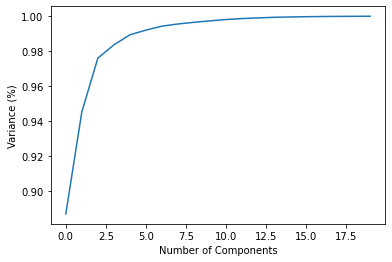

In [119]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_valid)

pca = PCA().fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

Setting adapting parameters for the model by using GridSearchCV with KNN to emphasize accuracy 

In [132]:
k_range = list(range(3,21))
param_grid = {
    'n_neighbors': k_range,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
model.fit(x_train_scaled, y_train)

D:\Users\vaibh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [133]:
print(f'Model Score: {model.score(x_test_scaled, y_valid)}')

y_predict = model.predict(x_test_scaled)
print(f'Confusion Matrix: \n{confusion_matrix(y_predict, y_valid)}')

Model Score: 0.8737864077669902
Confusion Matrix: 
[[  2   1   0   0   0   0]
 [  0   0   0   0   0   0]
 [  2   1 167   3   4   3]
 [  0   0   1   5   1   3]
 [  0   1   3   0   6   1]
 [  0   2   0   0   0   0]]
